In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import math

In [2]:
from scipy.io import wavfile

In [3]:
rate, x = wavfile.read('test.wav')

In [4]:
rate

44100

In [5]:
y = []
for i in range(44100):
    y.append(x[i])

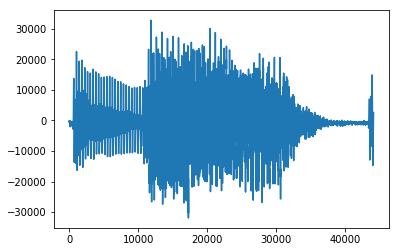

In [6]:
plt.plot(y)
plt.show()

In [7]:
from scipy.fftpack import fft,ifft,dct,idct

In [8]:
c = dct(y)
ym = idct(c)/88200

In [9]:
ym

array([ -456.,  -463.,  -353., ...,  2197.,  2384.,  2570.])

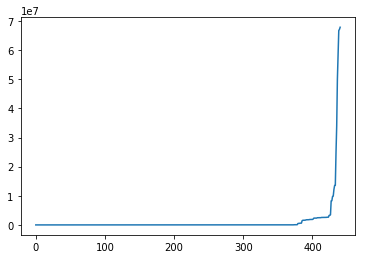

In [10]:
Cl = []
for L in range(1,442):
    cm = []
    sum = 0
    for i in range(44100-(100*L)):
        cm.append(c[i])
    for i in range(44100-(100*L),44100):
        cm.append(0)
    xm = idct(cm)/(88200)
    for i in range(44100):
        sum = sum + ((y[i]-xm[i])**2)
        q = sum/44100
    Cl.append(q)
plt.plot(Cl)
plt.show()

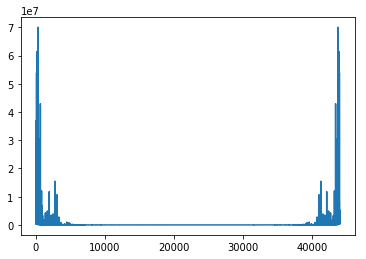

In [11]:
z = fft(y)
plt.plot(abs(z))
plt.show()

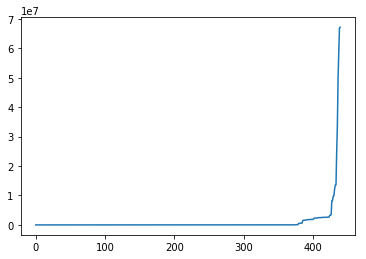

In [12]:
Dl = []
L = np.arange(100,44100,100)
for j in range(len(L)):
    zm = []
    sum = 0
    for i in range(math.floor((44101-L[j])/2)):
        zm.append(z[i])
    for i in range(math.floor((44101-L[j])/2),math.ceil((44101+L[j])/2)):
        zm.append(0)
    for i in range(math.ceil((44101+L[j])/2),44100):
        zm.append(z[i])
    dm = ifft(zm)
    for i in range(44100):
        sum = sum + ((abs(y[i]-dm[i]))**2)
        q = sum/44100
    Dl.append(q)
plt.plot(Dl)
plt.show()

In [13]:
plt.semilogy(Dl,color='green')
plt.semilogy(Cl,color='blue')

In [14]:
import pywt

In [15]:
a,d = pywt.dwt(y,'haar')

In [16]:
len(d)

22050

In [17]:
ym = pywt.idwt(a,d,'haar')

In [18]:
ym

array([ -456.,  -463.,  -353., ...,  2197.,  2384.,  2570.])

In [19]:
y-ym

array([  1.13686838e-13,   1.13686838e-13,   5.68434189e-14, ...,
        -4.54747351e-13,  -4.54747351e-13,  -4.54747351e-13])

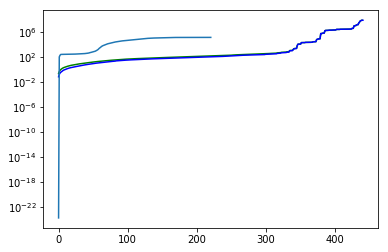

In [20]:
Hl = []
for i in range(221):
    dm = []
    sum = 0
    for j in range(22050 - (100*i)):
        dm.append(d[j])
    for j in range(22050 - (100*i),22050):
        dm.append(0)
    xm = pywt.idwt(a,dm,'haar')
    for i in range(44100):
        sum = sum + ((y[i]-xm[i])**2)
    q = sum/44100
    Hl.append(q)
plt.plot(Hl)
plt.show()

In [21]:
plt.semilogy(Hl,color = 'yellow')
plt.semilogy(Dl,color='green')
plt.semilogy(Cl,color='blue')